# Clustering Assignment-2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
##-- EDA---
list(df)

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [4]:
df.shape

(3999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


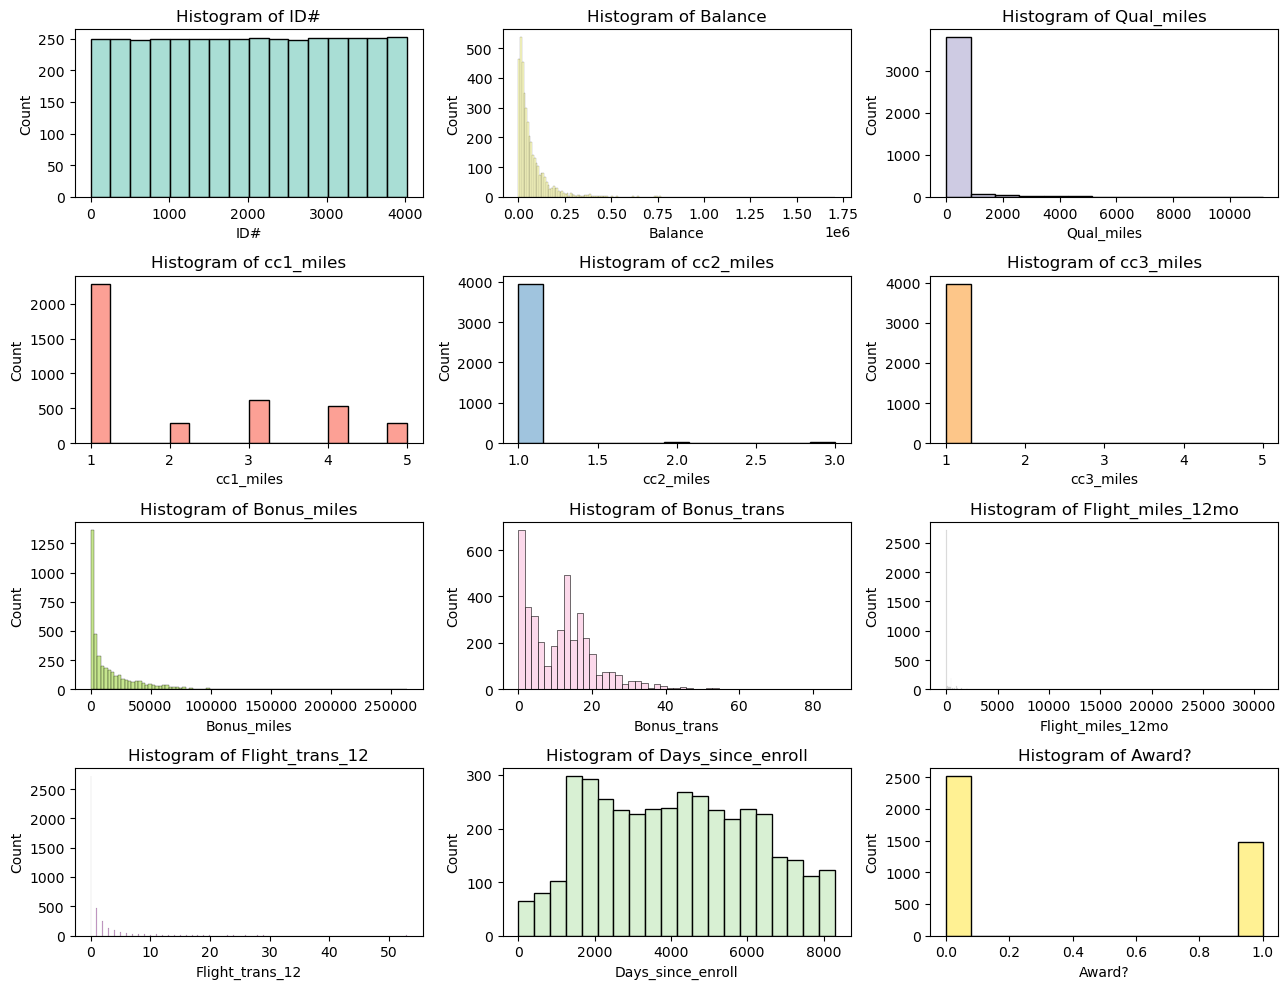

In [7]:
## histogram---
hisplot = ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
           'Bonus_miles','Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
           'Days_since_enroll', 'Award?']
plt.figure(figsize=(13, 10))
colors = sns.color_palette("Set3", len(hisplot))
for i, (column, color) in enumerate(zip(hisplot, colors), 1):
    if i <= 12:  # Limit the number of subplots to 6
        plt.subplot(4, 3, i)
        sns.histplot(df[column], color=color)
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

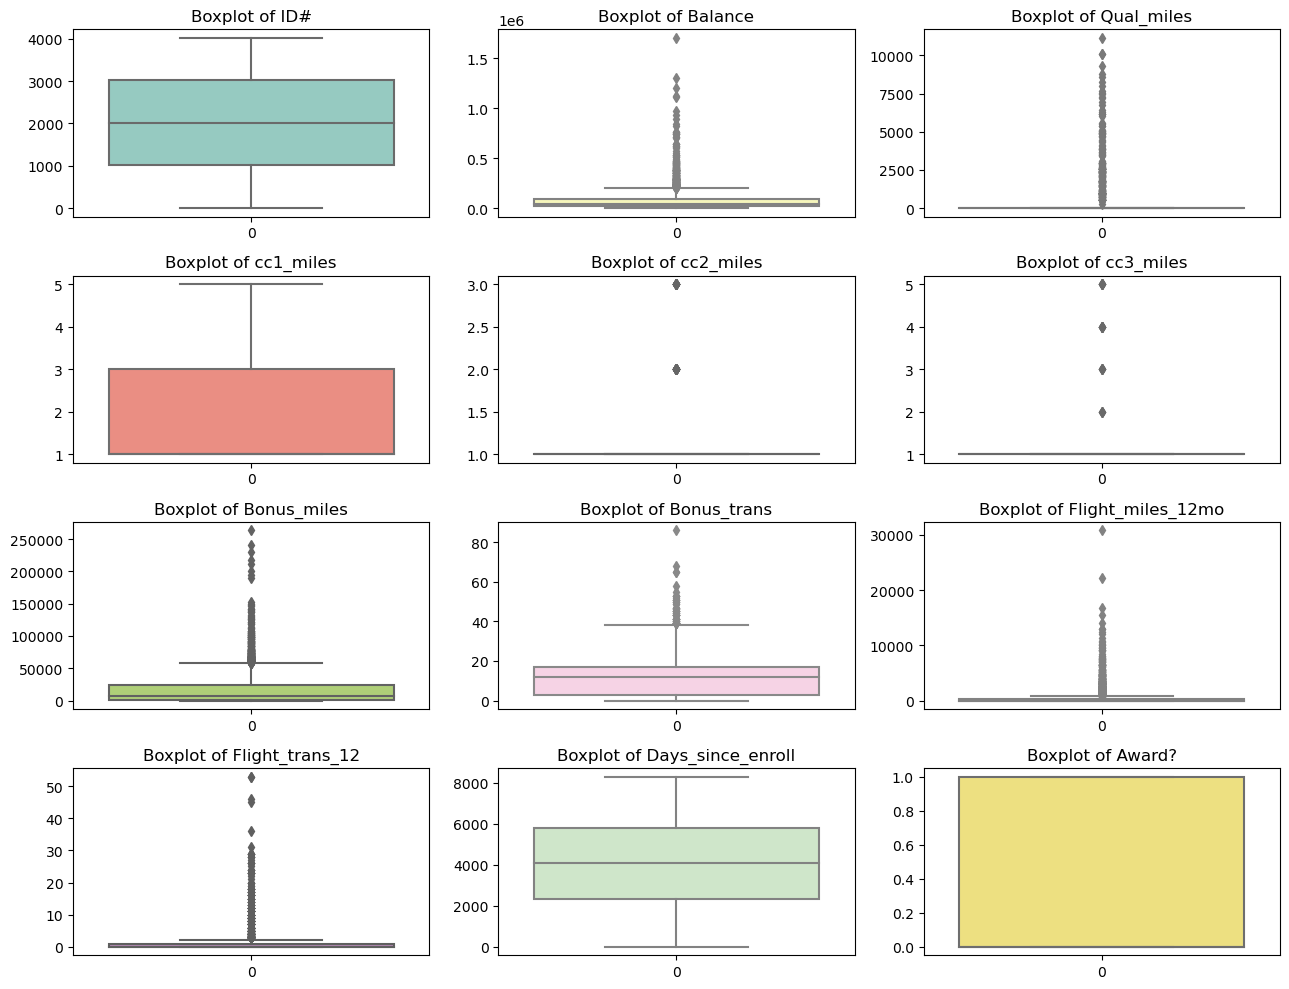

In [8]:
##---Box-plot--
boxplot = ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
           'Bonus_miles','Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
           'Days_since_enroll', 'Award?']
plt.figure(figsize=(13, 10))
colors = sns.color_palette("Set3", len(boxplot))
for i, (column, color) in enumerate(zip(boxplot, colors), 1):
    if i <= 12: 
        plt.subplot(4, 3, i)
        sns.boxplot(df[column], color=color)
        plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

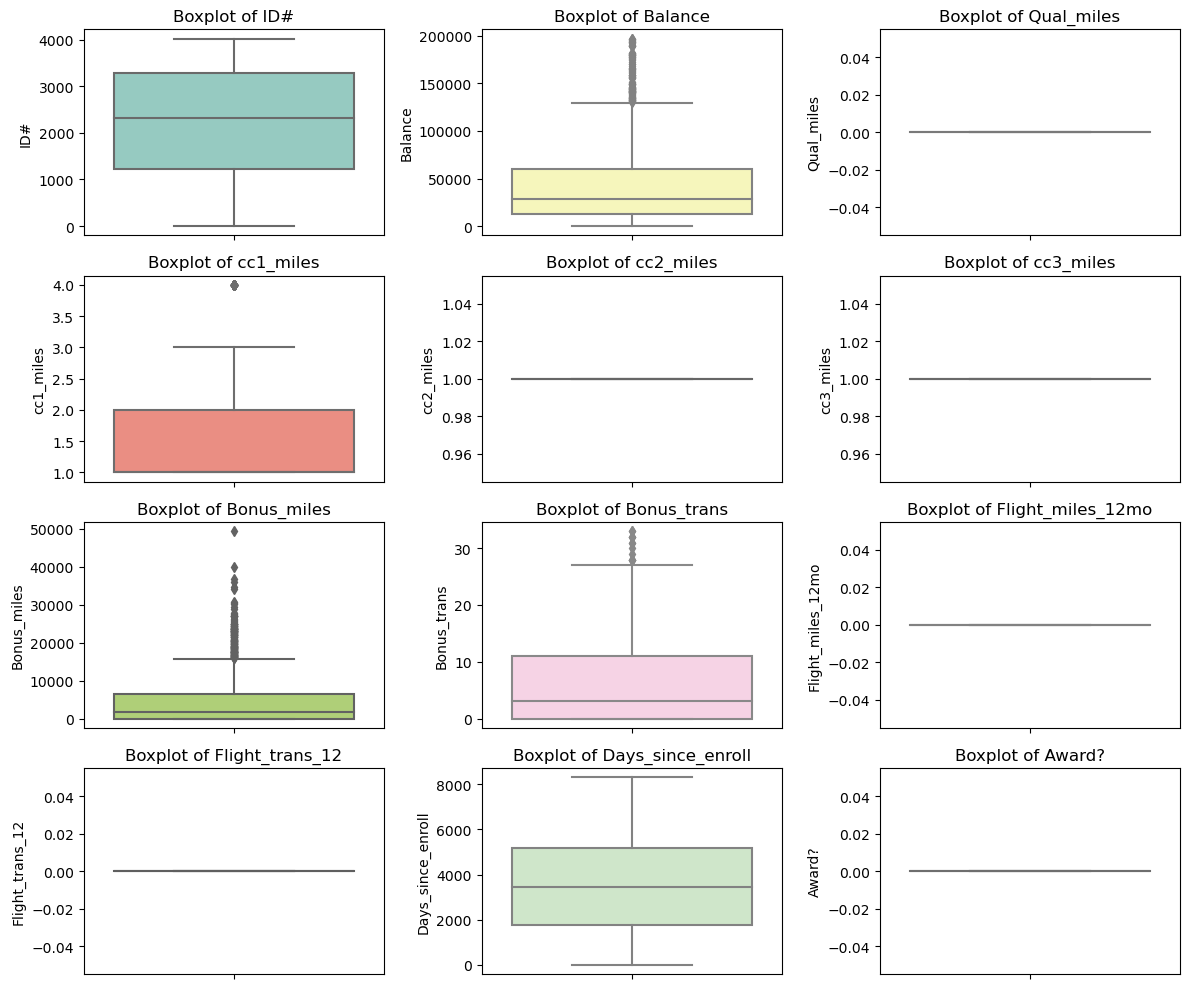

In [10]:
###--outliers---
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
colors = sns.color_palette("Set3", len(boxplot))
for i, (variable, color) in enumerate(zip(boxplot, colors)):
    sns.boxplot(data=df, y=variable, ax=axes[i // 3, i % 3], palette=[color])
    axes[i // 3, i % 3].set_title(f'Boxplot of {variable}')
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    df = df[~outliers]
plt.tight_layout()
plt.show()

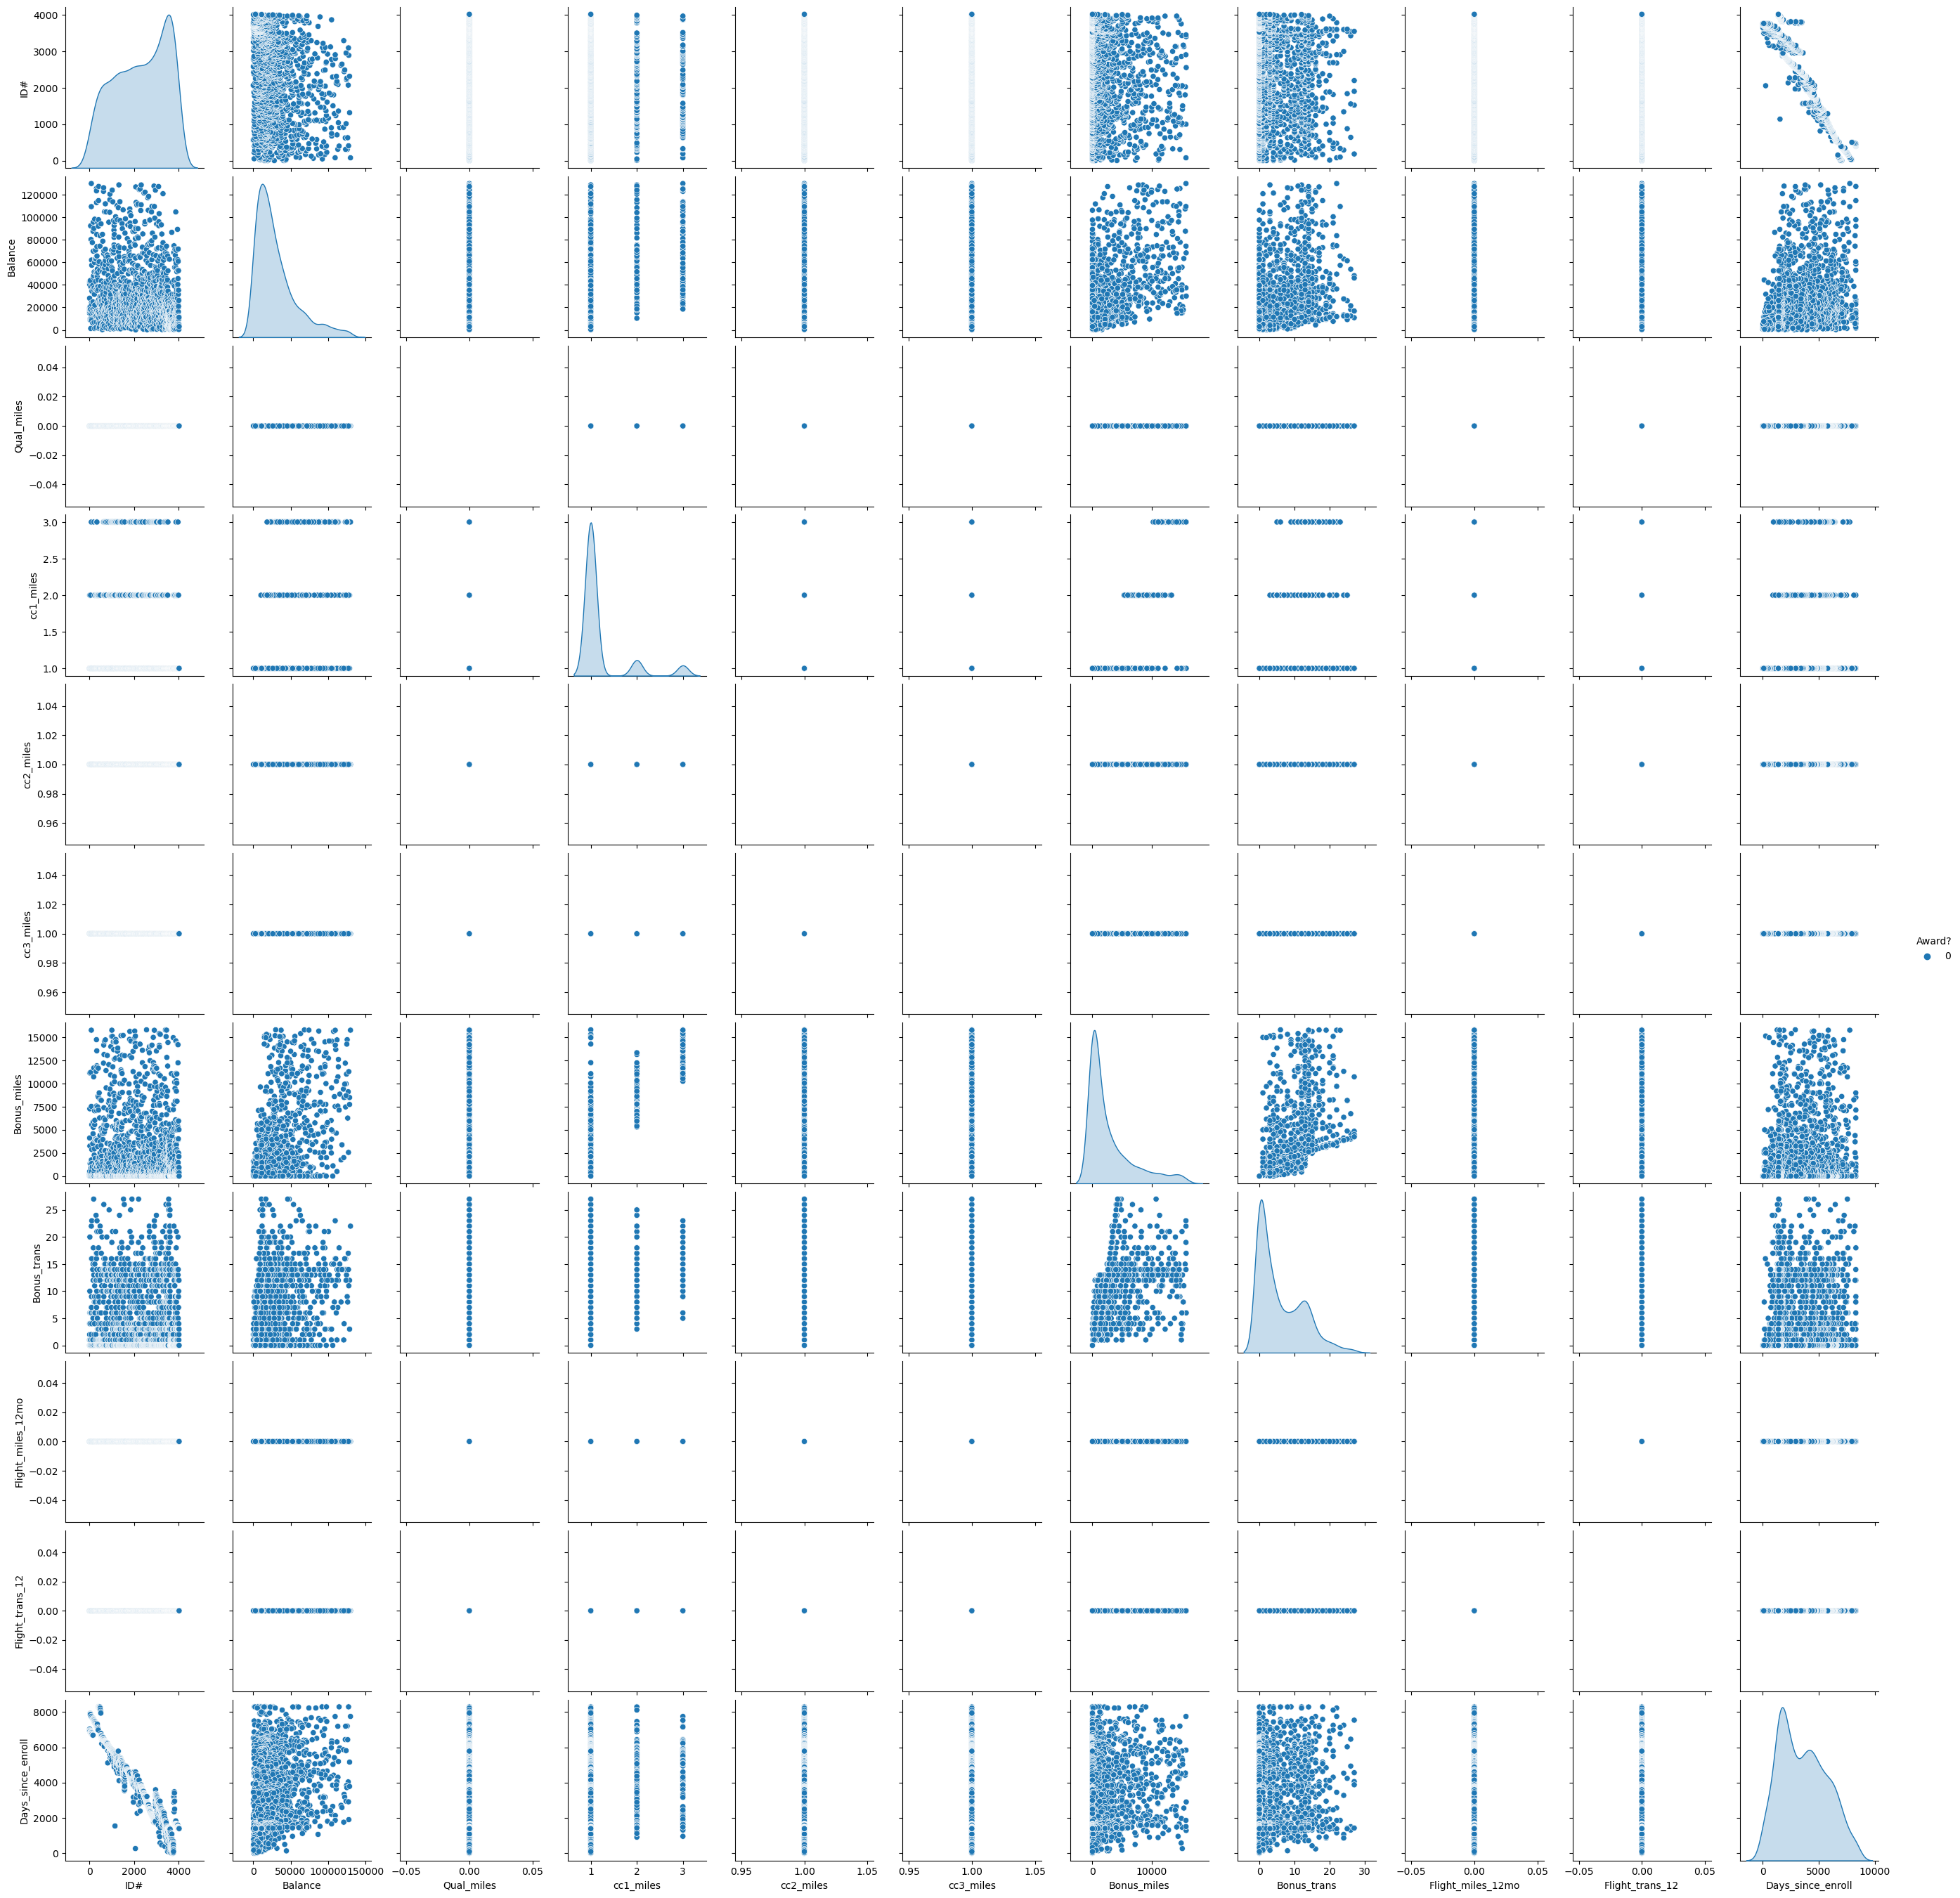

In [11]:
##--pair-plot--
sns.pairplot(df,hue='Award?')
plt.show()

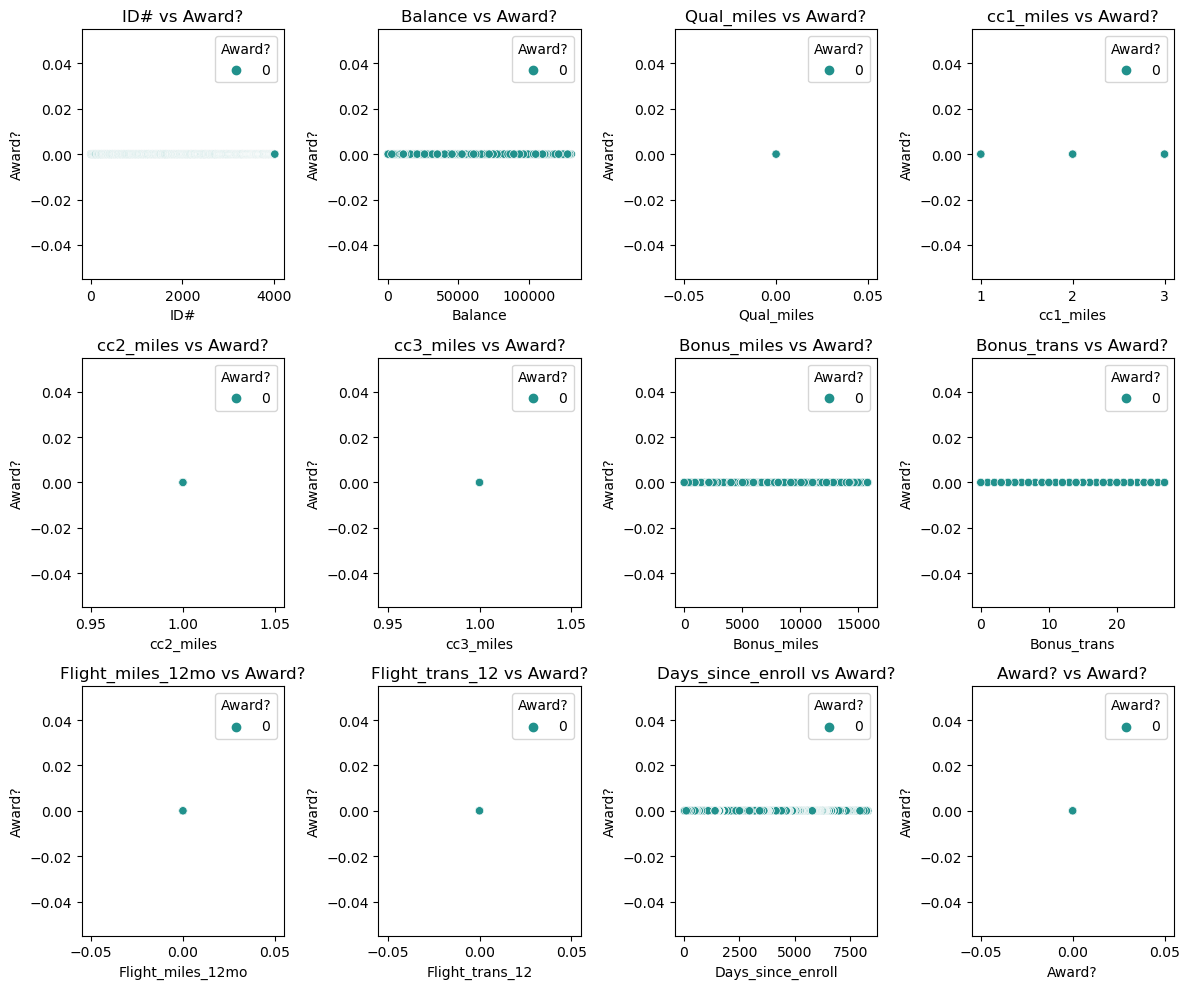

In [12]:
##--- Scatter plot---
df = pd.DataFrame(df)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
axes = axes.flatten()
colors = sns.color_palette('viridis', n_colors=len(df['Award?'].unique()))
for i, variable in enumerate(hisplot):
    sns.scatterplot(data=df, x=variable, y='Award?', ax=axes[i], hue='Award?', palette=colors)
    axes[i].set_title(f'{variable} vs Award?')
plt.tight_layout()
plt.show()

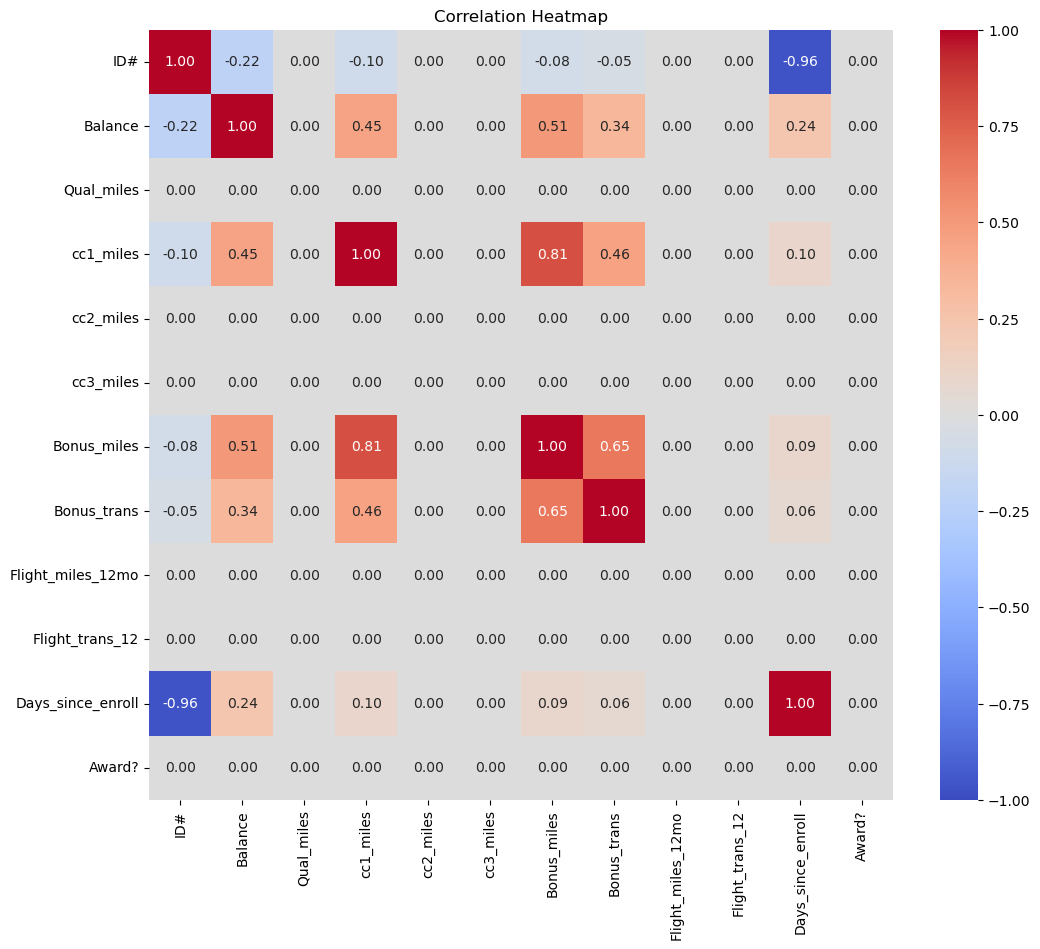

In [13]:
##--Heat-map---##
df_corr = df.corr().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

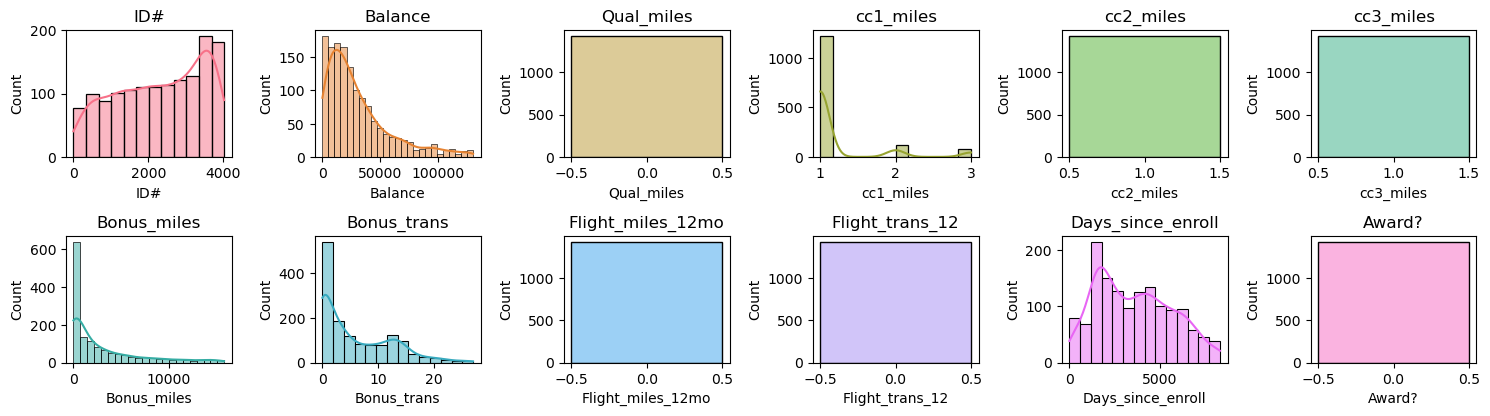

In [14]:
###--distribution-plots--
plt.figure(figsize=(15, 10))
colors = sns.color_palette("husl", len(hisplot))
for i, (column, color) in enumerate(zip(hisplot, colors), 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[column], kde=True, color=color)
    plt.title(column)
plt.tight_layout()
plt.show()

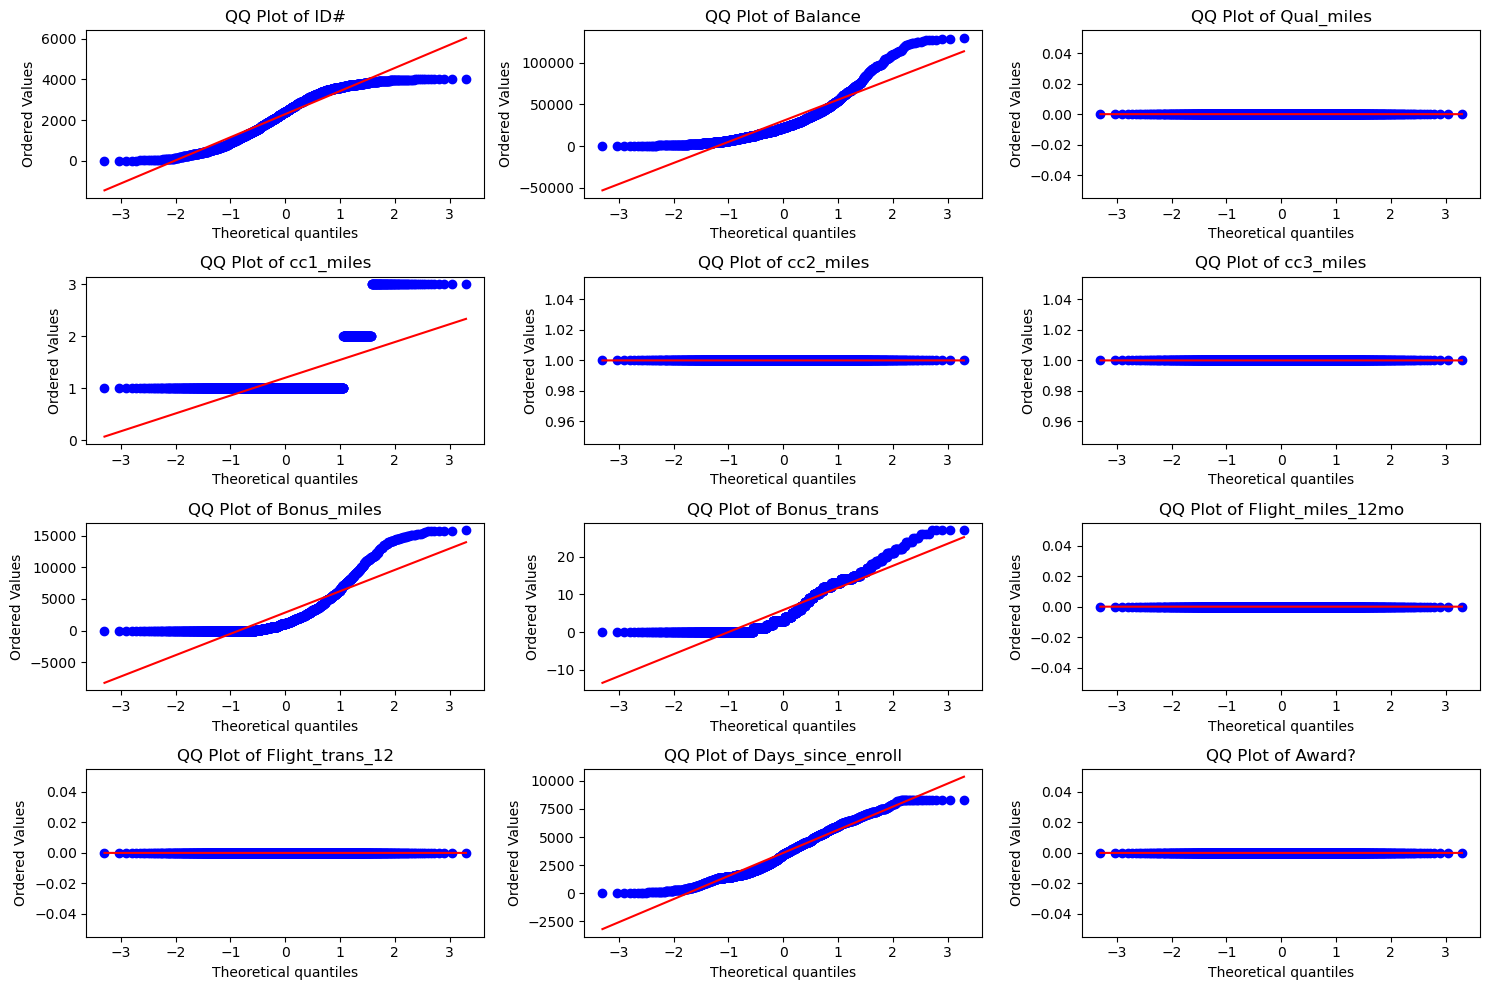

In [15]:
###-Q-Q-plot--

plt.figure(figsize=(15, 10))
for i, variable in enumerate(hisplot, 1):
    plt.subplot(4, 3, i)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {variable}')
plt.tight_layout()
plt.show()


In [16]:
##-- X-- variable
x=df.iloc[:,0:]

In [17]:
print(x)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3988  4011     5000           0          1          1          1         2125   
3990  4013    11310           0          1          1          1         5021   
3992  4015    11181           0          1          1          1          929   
3993  4016     3974           0          1          1          1          365   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [18]:
###-- Standardization--
SS=StandardScaler()
SS_X=SS.fit_transform(x)
pd.DataFrame(SS_X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.956995,-0.077938,0.0,-0.38415,0.0,0.0,-0.689235,-0.770036,0.0,0.0,1.631957,0.0
1,-1.956140,-0.402719,0.0,-0.38415,0.0,0.0,-0.678658,-0.612157,0.0,0.0,1.616613,0.0
2,-1.955284,0.404215,0.0,-0.38415,0.0,0.0,0.329458,-0.296398,0.0,0.0,1.648259,0.0
3,-1.954428,-0.565784,0.0,-0.38415,0.0,0.0,-0.605139,-0.770036,0.0,0.0,1.608942,0.0
4,-1.952717,-0.505784,0.0,-0.38415,0.0,0.0,-0.734120,-0.927916,0.0,0.0,1.604147,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1.474025,-0.922572,0.0,-0.38415,0.0,0.0,-0.185950,-0.454277,0.0,0.0,-1.047362,0.0
1423,1.475736,-0.692280,0.0,-0.38415,0.0,0.0,0.561108,-0.612157,0.0,0.0,-1.048801,0.0
1424,1.477447,-0.696988,0.0,-0.38415,0.0,0.0,-0.494473,0.966639,0.0,0.0,-1.049759,0.0
1425,1.478303,-0.960017,0.0,-0.38415,0.0,0.0,-0.639964,-0.454277,0.0,0.0,-1.054554,0.0


In [19]:
###-- K-means-clustering--
x, _ = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[-6.83235205, -6.83045748],
       [-2.70981136,  8.97143336],
       [ 4.7182049 ,  2.04179676],
       [-8.87357218,  7.17458342]])

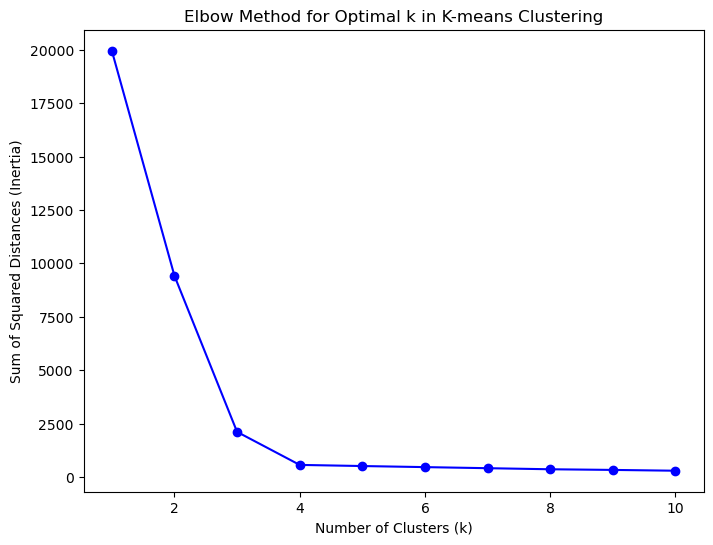

In [21]:
x, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-means clustering
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k in K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

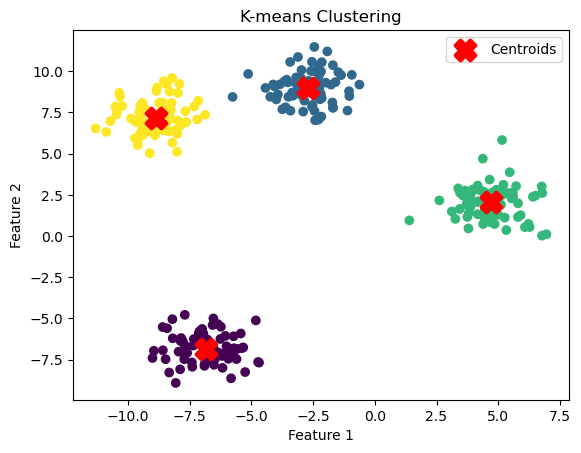

In [22]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [23]:
###--K-medoid-clustering--
kmedoids = KMedoids(n_clusters=4)
kmedoids.fit(x)
labels_medoids = kmedoids.labels_
medoids = x[kmedoids.medoid_indices_]
medoids

array([[ 4.75339618,  2.63530036],
       [ 4.68545068,  1.32156934],
       [-6.65553471, -6.86751719],
       [-5.75944695,  8.44309783]])

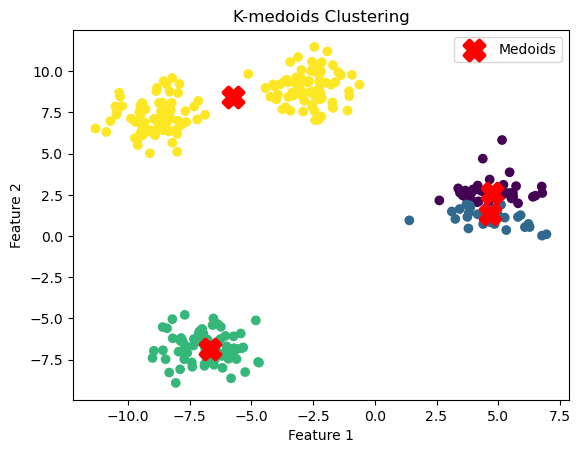

In [24]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels_medoids, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [25]:
#---Agglomerative hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglomerative.fit_predict(x)

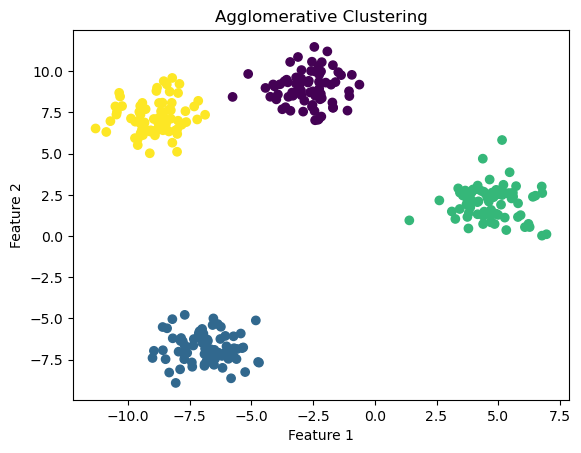

In [26]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

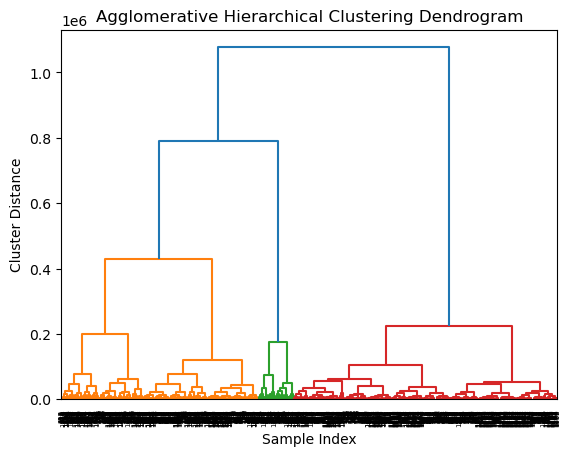

In [27]:
# Plot the dendrogram
linked = linkage(df, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [28]:
##---DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x)

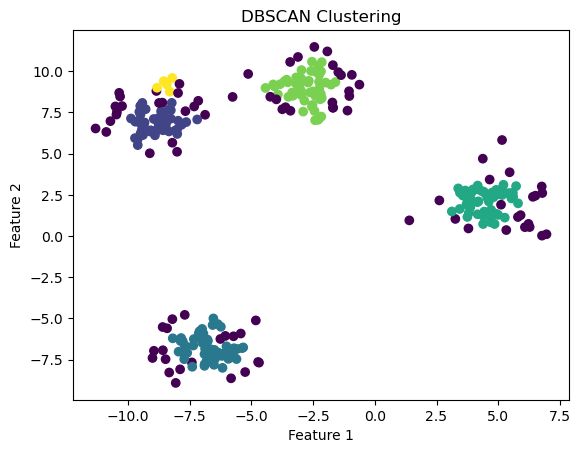

In [29]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()